In [58]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [43]:
df = pd.read_csv("income.csv")

In [44]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [46]:

X = df[['Age','Income($)']]
model = KMeans(n_clusters=3)

In [47]:
model.fit(X)

KMeans(n_clusters=3)

In [48]:
pred = model.predict(X) 

In [49]:
pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

Text(0, 0.5, 'Income($)')

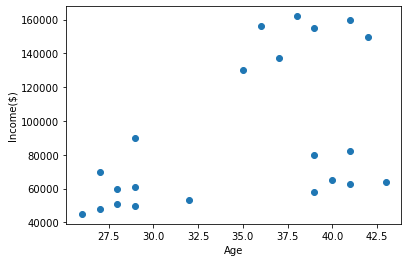

In [50]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [51]:
df['cluster'] = pred

In [52]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

Text(0, 0.5, 'Income($)')

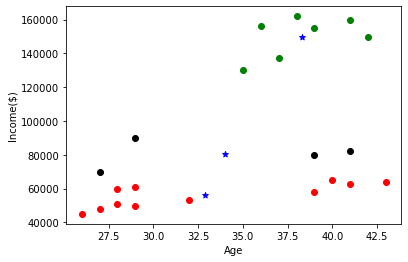

In [56]:
plt.scatter(df1['Age'],df1['Income($)'],c='green')
plt.scatter(df2['Age'],df2['Income($)'],c='red')
plt.scatter(df3['Age'],df3['Income($)'],c='black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*',c='blue')
plt.xlabel("Age")
plt.ylabel("Income($)")

In [54]:
model.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

# Normalize Values

In [59]:
scaler = MinMaxScaler()

In [62]:
age_scaled = scaler.fit_transform(df[['Age']])
df['Age_Scaled'] = age_scaled

income_scaled = scaler.fit_transform(df[['Income($)']])
df['income_scaled'] = income_scaled

In [63]:
df.head()

,Name,Age,Income($),cluster,Age_Scaled,income_scaled
0,Rob,27,70000,2,0.058824,0.213675
1,Michael,29,90000,2,0.176471,0.384615
2,Mohan,29,61000,1,0.176471,0.136752
3,Ismail,28,60000,1,0.117647,0.128205
4,Kory,42,150000,0,0.941176,0.897436


In [66]:
X = df[['Age_Scaled','income_scaled']]
kmModel = KMeans(n_clusters=3)
pred_scaled = kmModel.fit_predict(X)

In [67]:
df['cluster_scaled'] = pred_scaled

In [68]:
df.head()

,Name,Age,Income($),cluster,Age_Scaled,income_scaled,cluster_scaled
0,Rob,27,70000,2,0.058824,0.213675,0
1,Michael,29,90000,2,0.176471,0.384615,0
2,Mohan,29,61000,1,0.176471,0.136752,0
3,Ismail,28,60000,1,0.117647,0.128205,0
4,Kory,42,150000,0,0.941176,0.897436,1


Text(0, 0.5, 'Income($)')

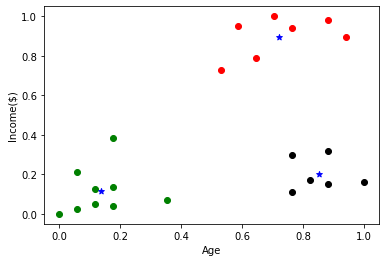

In [72]:
df1_1 = df[df['cluster_scaled'] == 0]
df2_1 = df[df['cluster_scaled'] == 1]
df3_1 = df[df['cluster_scaled'] == 2]

plt.scatter(df1_1['Age_Scaled'],df1_1['income_scaled'],c='green')
plt.scatter(df2_1['Age_Scaled'],df2_1['income_scaled'],c='red')
plt.scatter(df3_1['Age_Scaled'],df3_1['income_scaled'],c='black')
plt.scatter(kmModel.cluster_centers_[:,0],kmModel.cluster_centers_[:,1],marker='*',c='blue')
plt.xlabel("Age")
plt.ylabel("Income($)")